# Exploratory Data Analysis Starter

## Import packages

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [6]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [7]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [8]:
client_df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

In [9]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [10]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [11]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [12]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [13]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [14]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

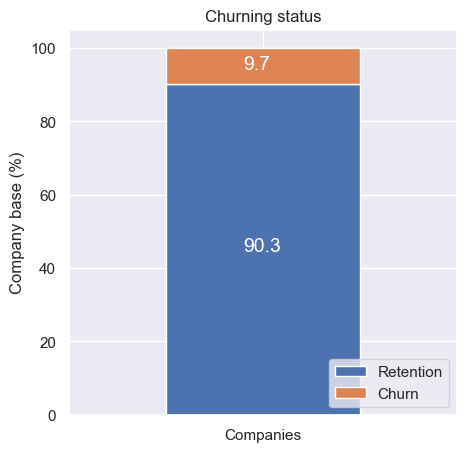

In [15]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

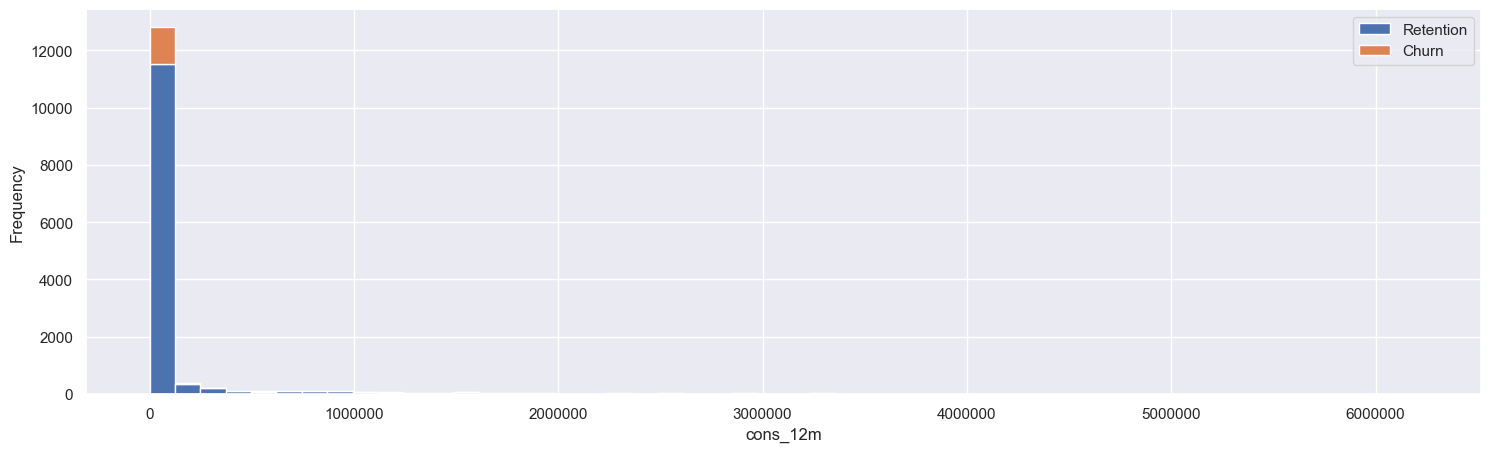

In [16]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

In [17]:
# Checking for missign values
client_df.replace('MISSING', np.NAN, inplace=True)
price_df.replace('MISSING', np.NAN, inplace=True)

In [18]:
client_df.isna().sum()

id                                   0
channel_sales                     3725
cons_12m                             0
cons_gas_12m                         0
cons_last_month                      0
date_activ                           0
date_end                             0
date_modif_prod                      0
date_renewal                         0
forecast_cons_12m                    0
forecast_cons_year                   0
forecast_discount_energy             0
forecast_meter_rent_12m              0
forecast_price_energy_off_peak       0
forecast_price_energy_peak           0
forecast_price_pow_off_peak          0
has_gas                              0
imp_cons                             0
margin_gross_pow_ele                 0
margin_net_pow_ele                   0
nb_prod_act                          0
net_margin                           0
num_years_antig                      0
origin_up                           64
pow_max                              0
churn                    

In [19]:
price_df.isna().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

In [20]:
object_df = pd.DataFrame()

# Iterate through columns and select those with object data type
for column in client_df.columns:
    if client_df[column].dtype == 'object':
        object_df[column] = client_df[column]

object_df

,id,channel_sales,date_activ,date_end,date_modif_prod,date_renewal,has_gas,origin_up
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,2013-06-15,2016-06-15,2015-11-01,2015-06-23,t,lxidpiddsbxsbosboudacockeimpuepw
1,d29c2c54acc38ff3c0614d0a653813dd,NaN,2009-08-21,2016-08-30,2009-08-21,2015-08-31,f,kamkkxfxxuwbdslkwifmmcsiusiuosws
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,2010-04-16,2016-04-16,2010-04-16,2015-04-17,f,kamkkxfxxuwbdslkwifmmcsiusiuosws
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,2010-03-30,2016-03-30,2010-03-30,2015-03-31,f,kamkkxfxxuwbdslkwifmmcsiusiuosws
4,149d57cf92fc41cf94415803a877cb4b,NaN,2010-01-13,2016-03-07,2010-01-13,2015-03-09,f,kamkkxfxxuwbdslkwifmmcsiusiuosws
...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,2012-05-24,2016-05-08,2015-05-08,2014-05-26,t,lxidpiddsbxsbosboudacockeimpuepw
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,2012-08-27,2016-08-27,2012-08-27,2015-08-28,f,lxidpiddsbxsbosboudacockeimpuepw
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,2012-02-08,2016-02-07,2012-02-08,2015-02-09,f,lxidpiddsbxsbosboudacockeimpuepw
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,2012-08-30,2016-08-30,2012-08-30,2015-08-31,f,lxidpiddsbxsbosboudacockeimpuepw


In [21]:
object_df.head(20
               )

,id,channel_sales,date_activ,date_end,date_modif_prod,date_renewal,has_gas,origin_up
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,2013-06-15,2016-06-15,2015-11-01,2015-06-23,t,lxidpiddsbxsbosboudacockeimpuepw
1,d29c2c54acc38ff3c0614d0a653813dd,NaN,2009-08-21,2016-08-30,2009-08-21,2015-08-31,f,kamkkxfxxuwbdslkwifmmcsiusiuosws
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,2010-04-16,2016-04-16,2010-04-16,2015-04-17,f,kamkkxfxxuwbdslkwifmmcsiusiuosws
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,2010-03-30,2016-03-30,2010-03-30,2015-03-31,f,kamkkxfxxuwbdslkwifmmcsiusiuosws
4,149d57cf92fc41cf94415803a877cb4b,NaN,2010-01-13,2016-03-07,2010-01-13,2015-03-09,f,kamkkxfxxuwbdslkwifmmcsiusiuosws
5,1aa498825382410b098937d65c4ec26d,usilxuppasemubllopkaafesmlibmsdf,2011-12-09,2016-12-09,2015-11-01,2015-12-10,f,lxidpiddsbxsbosboudacockeimpuepw
6,7ab4bf4878d8f7661dfc20e9b8e18011,foosdfpfkusacimwkcsosbicdxkicaua,2011-12-02,2016-12-02,2011-12-02,2015-12-03,f,lxidpiddsbxsbosboudacockeimpuepw
7,01495c955be7ec5e7f3203406785aae0,foosdfpfkusacimwkcsosbicdxkicaua,2010-04-21,2016-04-21,2010-04-21,2015-04-22,f,lxidpiddsbxsbosboudacockeimpuepw
8,f53a254b1115634330c12c7fdbf7958a,usilxuppasemubllopkaafesmlibmsdf,2011-09-23,2016-09-23,2011-09-23,2015-09-25,f,kamkkxfxxuwbdslkwifmmcsiusiuosws
9,10c1b2f97a2d2a6f10299dc213d1a370,lmkebamcaaclubfxadlmueccxoimlema,2010-05-04,2016-05-04,2015-04-29,2015-05-05,f,lxidpiddsbxsbosboudacockeimpuepw


In [22]:
object_df['origin_up'].value_counts()

origin_up
lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64

In [23]:
object_df['channel_sales'].value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

In [24]:
# Replacing the channel_sales values with forward fill.
client_df['channel_sales'] = client_df['channel_sales'].ffill()

In [25]:
# Finding the mode and replacing the values of the origin_up values with the mode.
mode_value = client_df['origin_up'].mode()[0]
print(mode_value)
client_df['origin_up'].fillna(mode_value, inplace=True)

lxidpiddsbxsbosboudacockeimpuepw


In [26]:
# Making a label encoding on the has_gas column.
client_df['has_gas'] = client_df['has_gas'].replace({'t': 1, 'f': 0})

In [27]:
client_df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,1,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,foosdfpfkusacimwkcsosbicdxkicaua,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,lmkebamcaaclubfxadlmueccxoimlema,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,1,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,0,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,0,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,0,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0


In [28]:
# Removing date_modif_prod
client_df.drop(['date_renewal'], axis = 1, inplace = True)

In [29]:
# Converting the date columns into date time format.
client_df['date_activ'] = pd.to_datetime(client_df['date_activ'])
client_df['date_end'] = pd.to_datetime(client_df['date_end'])
client_df['date_modif_prod'] = pd.to_datetime(client_df['date_modif_prod'])

In [30]:
# Modifying the date Modified into 1 and 0 where contract is modified and not modified respectively.
client_df['date_modif_prod'] = client_df.apply(lambda row: 1 if row['date_activ'] < row['date_modif_prod'] <= row['date_end'] else 0, axis=1)

In [31]:
# Creating a new column named contract duration for finding the duration of the contract (date activated - date ended) in months.
client_df['c_duration'] = round((client_df['date_end'] - client_df['date_activ']).dt.days / 30.4375, 2)


In [32]:
# Removing the date_activate and date_end
client_df = client_df.drop(columns=['date_activ', 'date_end'], axis = 1)

In [33]:
# Encoding the channel_sales and storing the encoding infromation.
channel_sales_categories = pd.Categorical(client_df["channel_sales"], ordered=True).categories
client_df['channel_sales'] = pd.Categorical(client_df['channel_sales'], ordered=True).codes
channel_sales_encoding = {code: category for code, category in enumerate(channel_sales_categories)}


# Encoding the origin_up and storing the encoding infromation.
origin_categories = pd.Categorical(client_df["origin_up"], ordered=True).categories
client_df['origin_up'] = pd.Categorical(client_df['origin_up'], ordered=True).codes
origin_up_encoding = {code: category for code, category in enumerate(origin_categories)}

In [34]:
client_df.head(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_modif_prod,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,...,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,c_duration
0,24011ae4ebbe3035111d65fa7c15bc57,3,0,54946,0,1,0.00,0,0.0,1.78,...,0.00,25.44,25.44,2,678.99,3,3,43.648,1,36.01
1,d29c2c54acc38ff3c0614d0a653813dd,3,4660,0,0,0,189.95,0,0.0,16.27,...,0.00,16.38,16.38,1,18.89,6,1,13.800,0,84.30
2,764c75f661154dac3a6c254cd082ea7d,3,544,0,0,0,47.96,0,0.0,38.72,...,0.00,28.60,28.60,1,6.60,6,1,13.856,0,72.02
3,bba03439a292a1e166f80264c16191cb,4,1584,0,0,0,240.04,0,0.0,19.83,...,0.00,30.22,30.22,1,25.46,6,1,13.200,0,72.02
4,149d57cf92fc41cf94415803a877cb4b,4,4425,0,526,0,445.75,526,0.0,131.73,...,52.32,44.91,44.91,1,47.98,6,1,19.800,0,73.76


In [35]:
client_df['channel_sales'].value_counts()

channel_sales
3    9076
4    2456
6    1865
1    1185
5      18
0       3
2       3
Name: count, dtype: int64

In [36]:
client_df.to_csv("client_data_cleaned.csv", index = False)

# EDA

In [37]:
# Loading the cleaned csv File.
client_data = pd.read_csv('client_data_cleaned.csv')
price_data = pd.read_csv('price_data.csv')

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_modif_prod,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,...,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,c_duration
0,24011ae4ebbe3035111d65fa7c15bc57,3,0,54946,0,1,0.00,0,0.0,1.78,...,0.00,25.44,25.44,2,678.99,3,3,43.648,1,36.01
1,d29c2c54acc38ff3c0614d0a653813dd,3,4660,0,0,0,189.95,0,0.0,16.27,...,0.00,16.38,16.38,1,18.89,6,1,13.800,0,84.30
2,764c75f661154dac3a6c254cd082ea7d,3,544,0,0,0,47.96,0,0.0,38.72,...,0.00,28.60,28.60,1,6.60,6,1,13.856,0,72.02
3,bba03439a292a1e166f80264c16191cb,4,1584,0,0,0,240.04,0,0.0,19.83,...,0.00,30.22,30.22,1,25.46,6,1,13.200,0,72.02
4,149d57cf92fc41cf94415803a877cb4b,4,4425,0,526,0,445.75,526,0.0,131.73,...,52.32,44.91,44.91,1,47.98,6,1,19.800,0,73.76


In [38]:
"""
- EDA of the features
- Submit the notebook for Task 2.
- Check the Task 3 and watch the videos of Task 3.
- Learn about different feature engineering technques.
"""

'\n- EDA of the features\n- Submit the notebook for Task 2.\n- Check the Task 3 and watch the videos of Task 3.\n- Learn about different feature engineering technques.\n'

In [39]:
client_data.describe()

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_modif_prod,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,c_duration
count,14606.000000,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,...,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,3.390593,1.592203e+05,2.809238e+04,16090.269752,0.500479,1868.614880,1399.762906,0.966726,63.086871,0.137283,...,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,2.196426,18.135136,0.097152,65.956267
std,1.223267,5.734653e+05,1.629731e+05,64364.196422,0.500017,2387.571531,3247.786255,5.108289,66.165783,0.024623,...,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,0.864035,13.534743,0.296175,19.873091
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.300000,0.000000,24.020000
25%,3.000000,5.674750e+03,0.000000e+00,0.000000,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,...,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,1.000000,12.500000,0.000000,48.000000
50%,3.000000,1.411550e+04,0.000000e+00,792.500000,1.000000,1112.875000,314.000000,0.000000,18.795000,0.143166,...,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,2.000000,13.856000,0.000000,60.075000
75%,4.000000,4.076375e+04,0.000000e+00,3383.000000,1.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,...,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,3.000000,19.172500,0.000000,77.310000
max,6.000000,6.207104e+06,4.154590e+06,771203.000000,1.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,...,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,4.000000,320.000000,1.000000,157.540000


In [40]:
customer_data = client_data[['channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_modif_prod', 'forecast_cons_12m', 'forecast_cons_year',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
       'forecast_price_pow_off_peak', 'has_gas', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'c_duration']]
customer_data

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_modif_prod,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,c_duration
0,3,0,54946,0,1,0.00,0,0.0,1.78,0.114481,...,1,0.00,25.44,25.44,2,678.99,3,3,43.648,36.01
1,3,4660,0,0,0,189.95,0,0.0,16.27,0.145711,...,0,0.00,16.38,16.38,1,18.89,6,1,13.800,84.30
2,3,544,0,0,0,47.96,0,0.0,38.72,0.165794,...,0,0.00,28.60,28.60,1,6.60,6,1,13.856,72.02
3,4,1584,0,0,0,240.04,0,0.0,19.83,0.146694,...,0,0.00,30.22,30.22,1,25.46,6,1,13.200,72.02
4,4,4425,0,526,0,445.75,526,0.0,131.73,0.116900,...,0,52.32,44.91,44.91,1,47.98,6,1,19.800,73.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,3,32270,47940,0,1,4648.01,0,0.0,18.57,0.138305,...,1,0.00,27.88,27.88,2,381.77,4,3,15.000,47.47
14602,3,7223,0,181,0,631.69,181,0.0,144.03,0.100167,...,0,15.94,0.00,0.00,1,90.34,3,3,6.000,48.00
14603,3,1844,0,179,0,190.39,179,0.0,129.60,0.116900,...,0,18.05,39.84,39.84,1,20.38,4,3,15.935,47.97
14604,3,131,0,0,0,19.34,0,0.0,7.18,0.145711,...,0,0.00,13.08,13.08,1,0.96,3,3,11.000,48.00


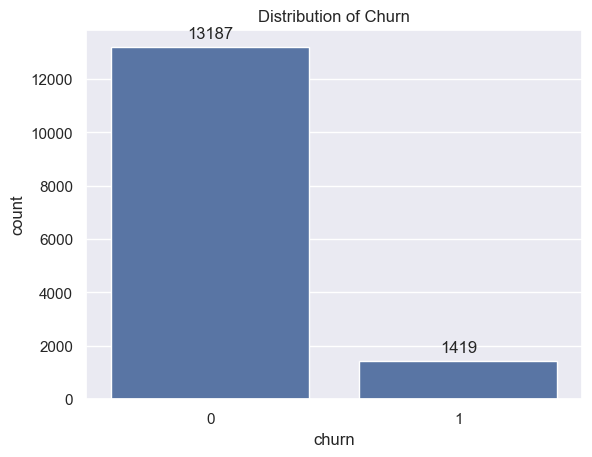

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot
ax = sns.countplot(x ='churn', data=client_data)

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Distribution of Churn')
plt.show()


In [42]:
client_data.shape

(14606, 24)

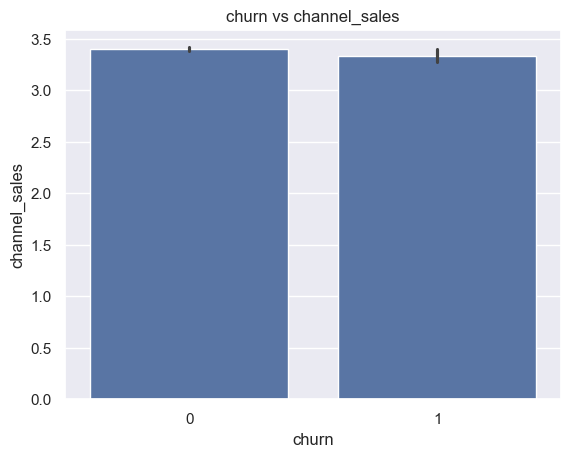

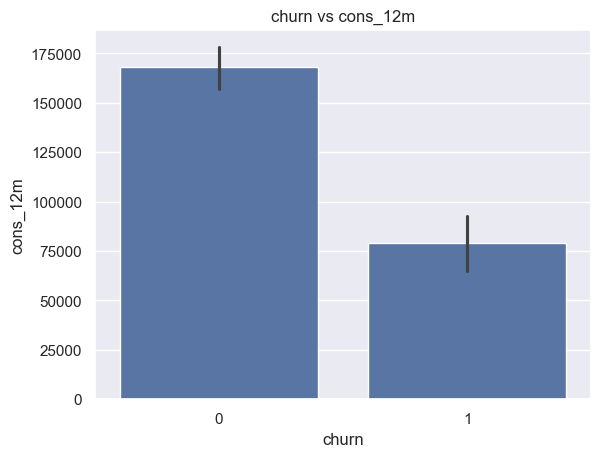

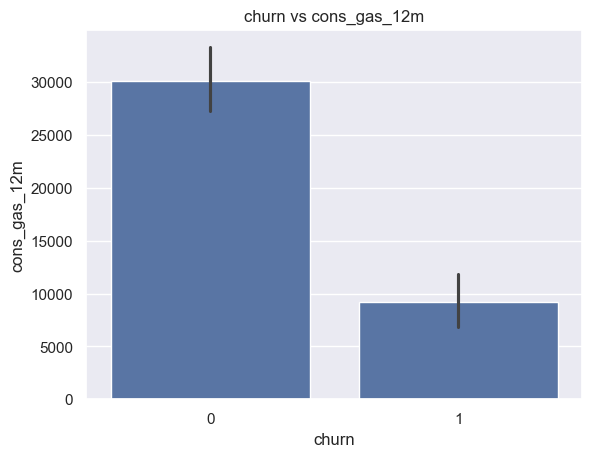

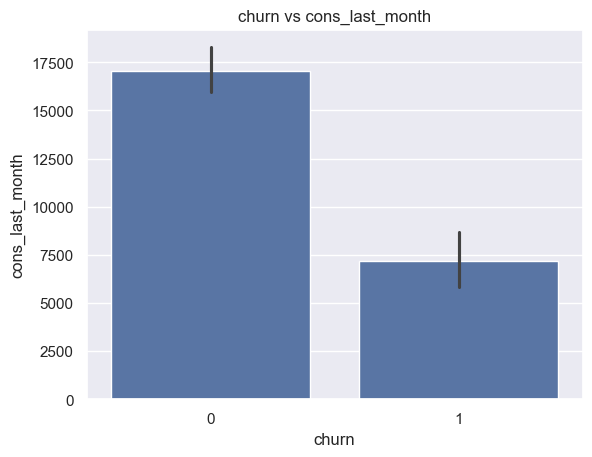

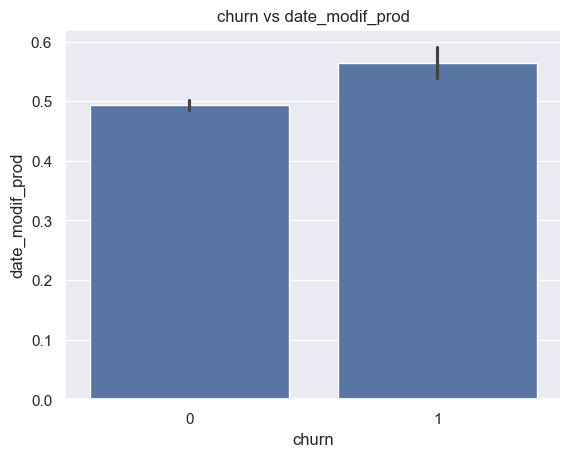

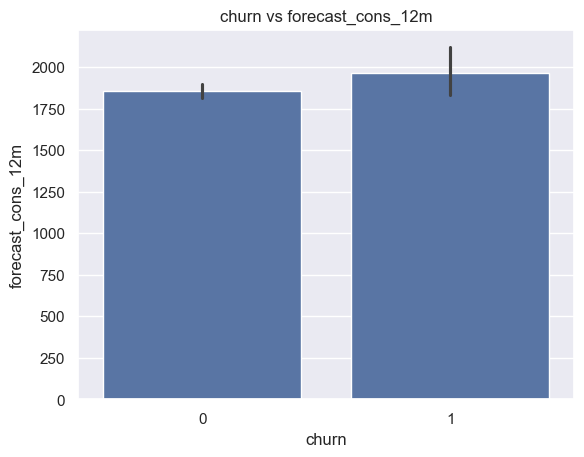

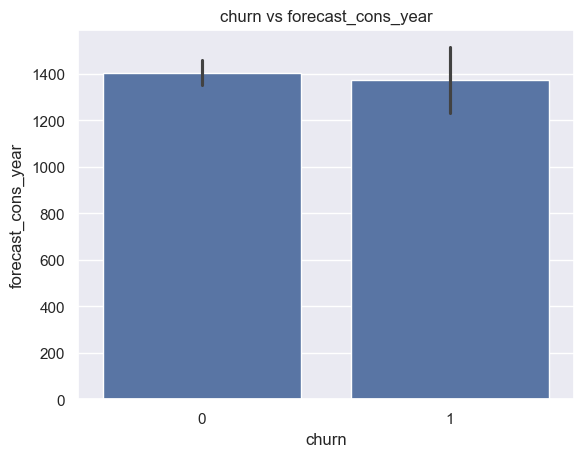

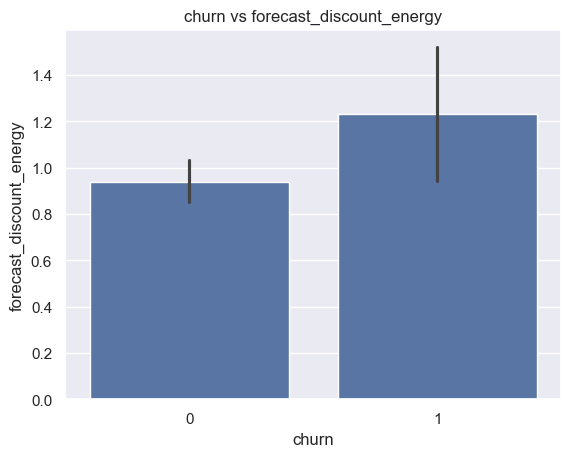

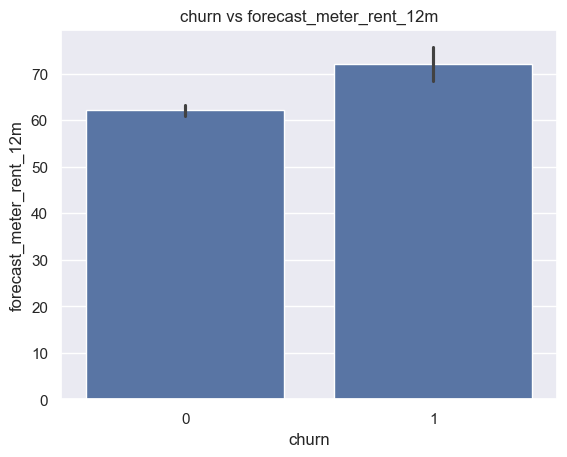

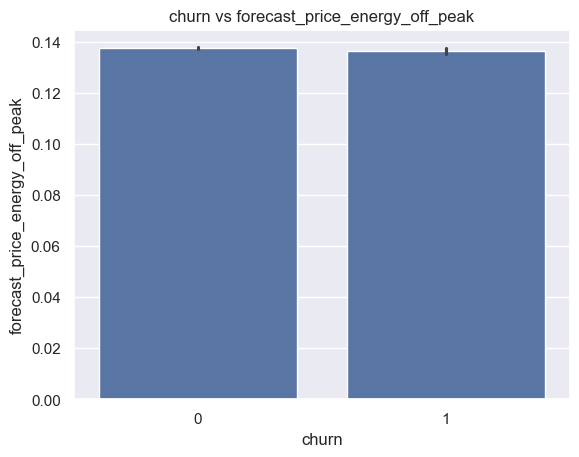

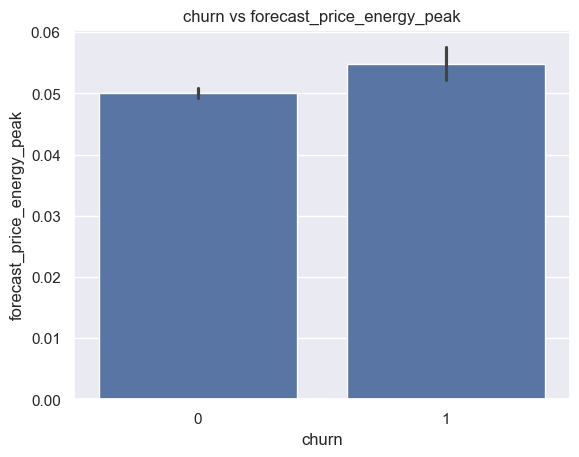

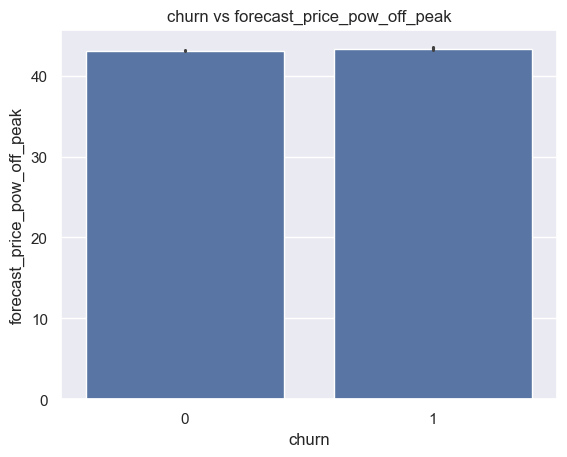

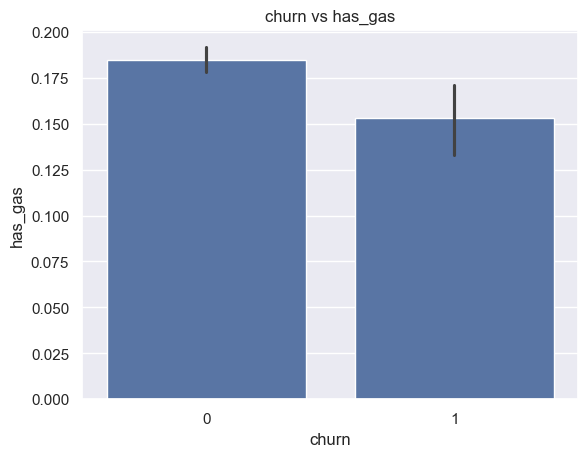

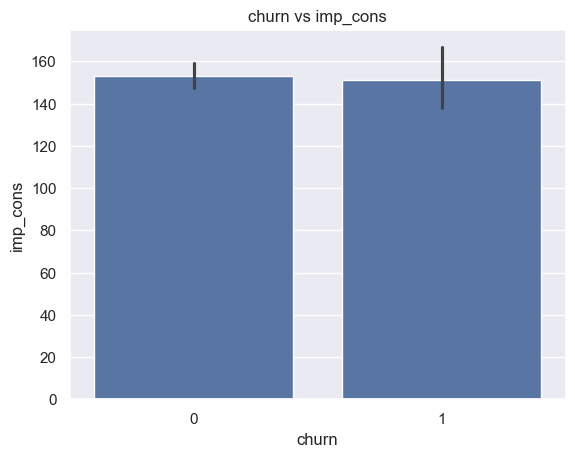

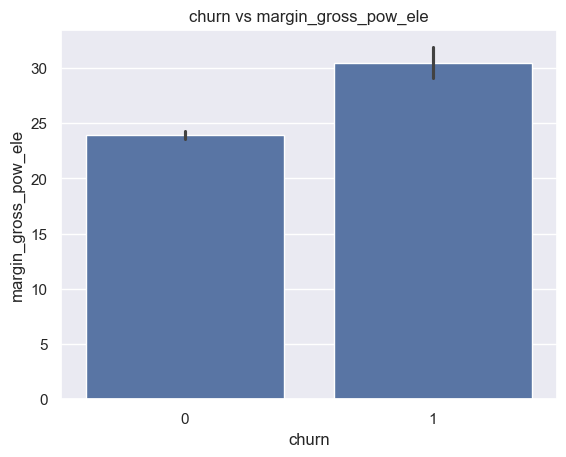

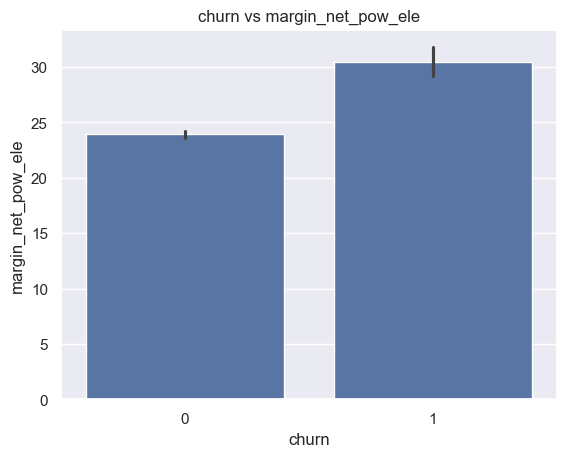

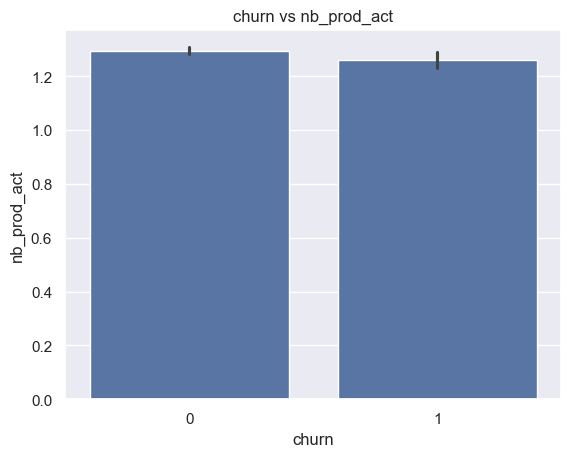

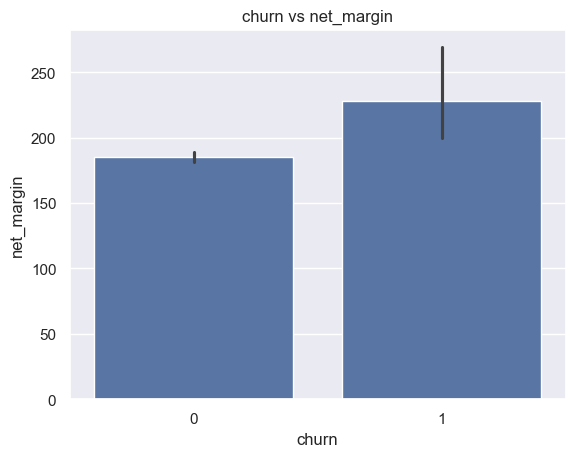

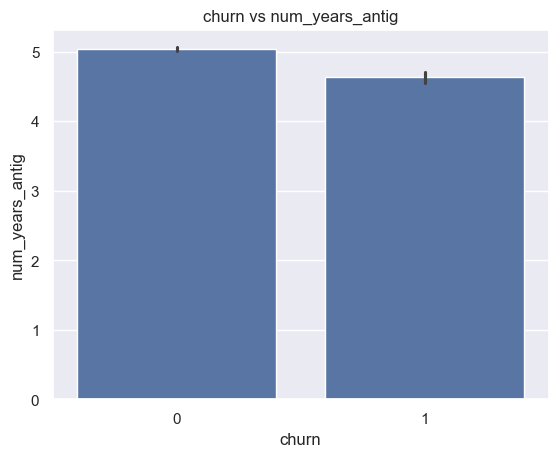

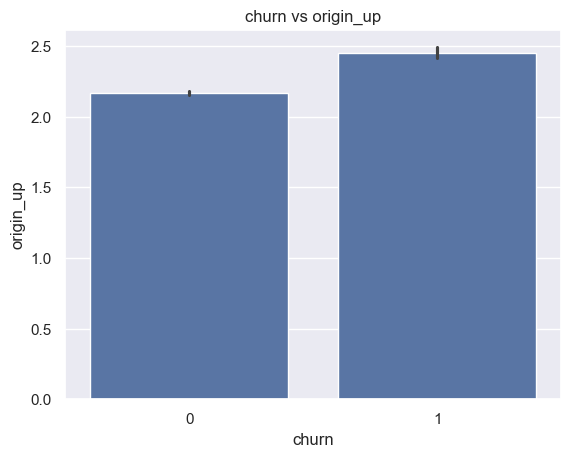

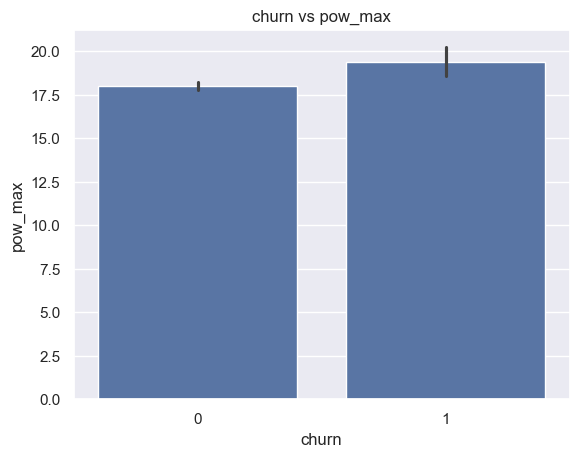

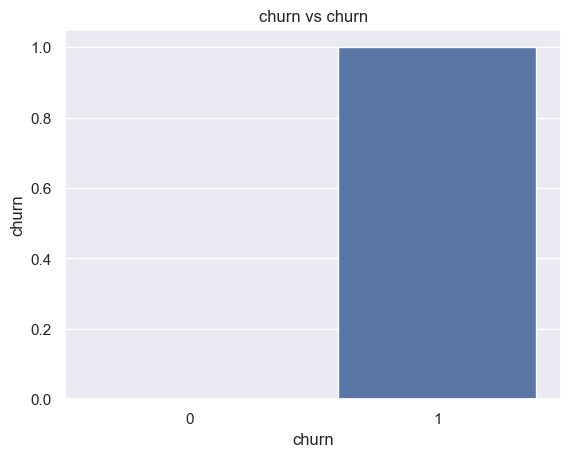

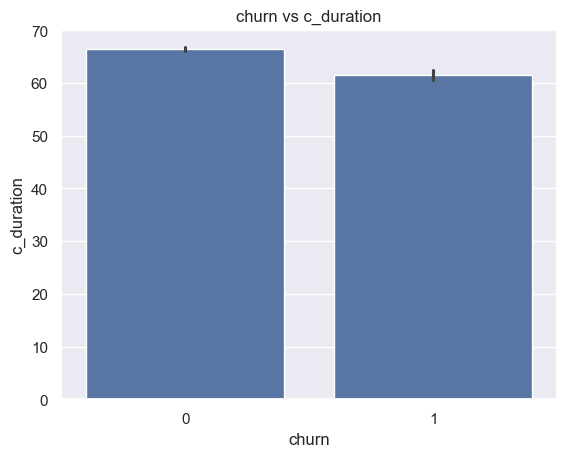

In [43]:
# Numerical feature analysis
numerical_features = client_data.select_dtypes(include=['int', 'float']).columns

for feature in numerical_features:
    sns.barplot(x = 'churn', y= feature, data = client_data)
    plt.title(f'churn vs {feature}')
    plt.show()

In [44]:
merged_df = pd.merge(client_data, price_data, on='id', how='right')

In [50]:
customer_data = client_data[['channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_modif_prod', 'forecast_cons_12m', 'forecast_cons_year',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
       'forecast_price_pow_off_peak', 'has_gas', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'c_duration', 'churn']]

AttributeError: module 'matplotlib.pyplot' has no attribute 'update_traces'

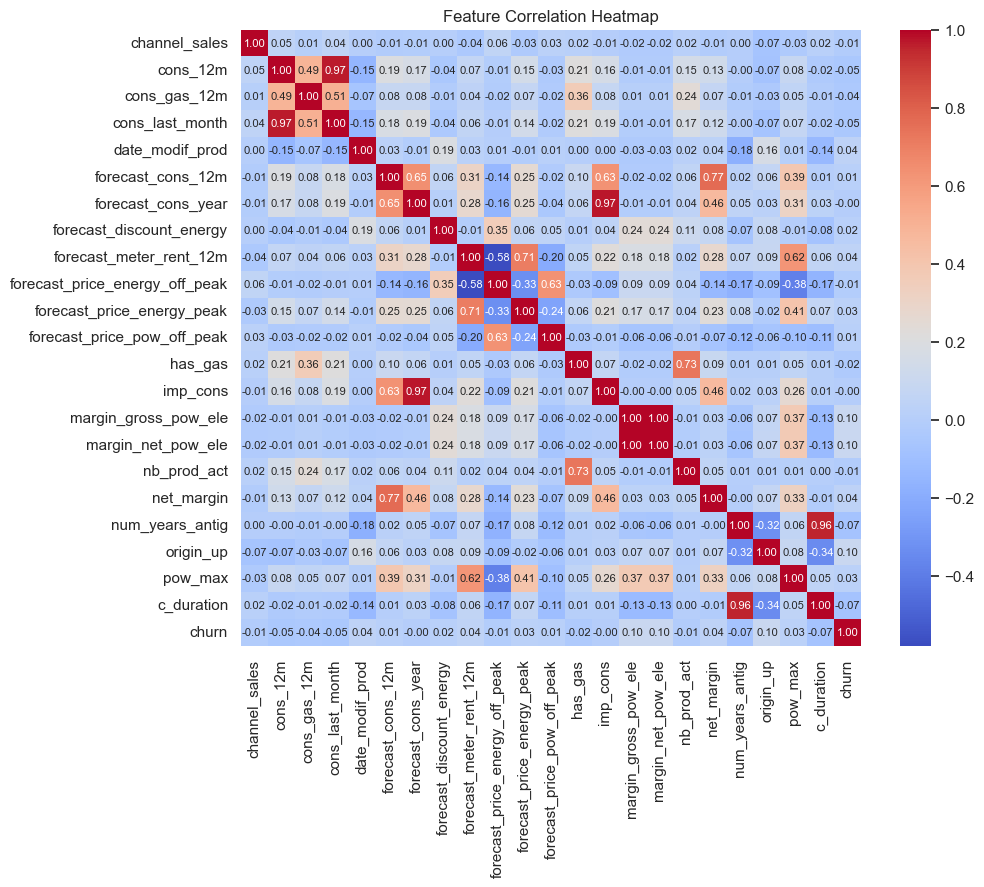

In [53]:
# Heatmap plot.
# Calculate the correlation matrix
correlation_matrix = customer_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Feature Correlation Heatmap')
plt.show()


In [49]:
# Filter correlation matrix to get pairs with correlation greater than 0.5
high_correlation_pairs = correlation_matrix[abs(correlation_matrix) > 0.5]
high_correlation_pairs = high_correlation_pairs.unstack().dropna().reset_index()
high_correlation_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_correlation_pairs = high_correlation_pairs[high_correlation_pairs['Feature 1'] != high_correlation_pairs['Feature 2']]
high_correlation_pairs = high_correlation_pairs.sort_values(by='Correlation', ascending=False)

# Filter pairs with correlation greater than 0.5
high_correlation_pairs = high_correlation_pairs[high_correlation_pairs['Correlation'] > 0.5]

high_correlation_pairs


,Feature 1,Feature 2,Correlation
35,margin_net_pow_ele,margin_gross_pow_ele,0.999914
34,margin_gross_pow_ele,margin_net_pow_ele,0.999914
15,forecast_cons_year,imp_cons,0.969395
31,imp_cons,forecast_cons_year,0.969395
2,cons_12m,cons_last_month,0.968212
5,cons_last_month,cons_12m,0.968212
42,num_years_antig,c_duration,0.956439
46,c_duration,num_years_antig,0.956439
12,forecast_cons_12m,net_margin,0.768537
39,net_margin,forecast_cons_12m,0.768537


In [ ]:
merged_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_modif_prod,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,...,pow_max,churn,c_duration,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,3.0,3576.0,0.0,630.0,1.0,531.5,630.0,0.0,19.59,...,13.2,0.0,36.01,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,3.0,3576.0,0.0,630.0,1.0,531.5,630.0,0.0,19.59,...,13.2,0.0,36.01,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,3.0,3576.0,0.0,630.0,1.0,531.5,630.0,0.0,19.59,...,13.2,0.0,36.01,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,3.0,3576.0,0.0,630.0,1.0,531.5,630.0,0.0,19.59,...,13.2,0.0,36.01,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,3.0,3576.0,0.0,630.0,1.0,531.5,630.0,0.0,19.59,...,13.2,0.0,36.01,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [ ]:
merged_df['id'].value_counts()

id
038af19179925da21a25619c5a24b745    12
97589d95ec46ab31ef238d18a616403f    12
97adbcd721fae4874f7ee287ea84200d    12
d74b4544363be674855cf931b6b8af25    12
27276020e48d73f589788d4e37c51879    12
                                    ..
83cf18b07114e495ae8b7fb235e45ee2     8
3e459d61dc831e29f8a9a9a59f95efd2     8
c5dcd5c506e565aaabffa29bc1ec0a37     7
bf89f2d8c1b133a134fd93603cb4c947     7
15b36e47cf04bf151e3f4438d12672e5     7
Name: count, Length: 16096, dtype: int64

In [ ]:
"""
- what does that bar plot against target with each feature determine?
- Is it actually necessary ?
- What other kinds of data we can use for customer churn analysis?
- How can we find the feature importance?
- Check for kaggle notebook doing customer chun how they are doing EDA and finding the feature importance?
- Finish visualization and submit the Task 2.
"""

(193002, 31)